<a href="https://colab.research.google.com/github/varunpothu/Research_Methods_Assignment/blob/main/R_M__Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Individual Project - Large Language Models**
---
* **Name :** Varun Pothu
* **Student ID :** 21080409
* **Subject ID :** 7PAM2015-0509-2023
* **Subject :** Research Methods in Data Science
---

**Brief and Aim of the Assignment:**
---

In this assignment, I aim to develop a text classification model to analyze and predict the sentiment of DEI-related articles. The goal is to train a BERT-style language model to classify the sentiment of articles based on their content and DEI topic. By fine-tuning the model using this dataset, I seek to enhance its ability to understand and categorize sentiments expressed in various DEI contexts.



**Problem Statement:**


---


Understanding the sentiment of DEI-related articles is crucial for gaining insights into public attitudes and discourse on Diversity, Equity, and Inclusion. I am tasked with developing a robust machine learning model to accurately predict the sentiment of these articles based on their content and associated DEI topics. By fine-tuning a BERT model on this dataset, I aim to improve automated sentiment analysis within the DEI domain, which can assist organizations and researchers in addressing and responding to DEI issues more effectively.

**Dataset Summary:**
---
The dataset includes articles related to Diversity, Equity, and Inclusion (DEI), encompassing columns such as title, content, URL, sentiment label, and basis. The basis column categorizes the underlying DEI topic into four types:

1.   Gender
2.   Race
3.   Disability
4.   Other

The sentiment label reflects the sentiment expressed in each article (e.g., positive, negative, neutral).



```
Dataset Link: https://huggingface.co/datasets/deancgarcia/Diversity
```



### Importing Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [17]:
# Load the dataset using Hugging Face's datasets
diversity_df = pd.read_csv("hf://datasets/deancgarcia/Diversity/train.csv")

# Convert to pandas DataFrame
diversity_df = pd.DataFrame(dataset['train'])

# Display the first few rows
print(diversity_df.head())


    ID                                              Title  \
0    1  Census data: US is diversifying, white populat...   
1    2  Workplace Diversity and Inclusion Gets Innovative   
2  404  Future immigration will change the face of Ame...   
3  410  Early Benchmarks Show ‘Post-Millennials’ on Tr...   
4  412  Millennials overtake Baby Boomers as America’s...   

                                             Content  Basis  \
0  No racial or ethnic group dominates for those ...      2   
1  wont be long before U. S. minorities are not i...      2   
2  A snapshot of the United States in 2065 would ...      2   
3  As a new generation of Americans begins to tak...      2   
4  Millennials have surpassed Baby Boomers as the...      2   

                                                 URL  Sentiment  Unnamed: 6  
0  https://apnews.com/article/race-and-ethnicity-...      False       156.0  
1  https://www.shrm.org/hr-today/news/hr-magazine...       True         NaN  
2  https://www.pewre

In [18]:
diversity_df.head()

,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False,156.0
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True,NaN
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True,NaN
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True,NaN
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True,NaN


### Data Investigation

Descriptive Statistics

In [20]:
# Display statistics for numerical columns
diversity_df.describe()

,ID,Basis,Unnamed: 6
count,482.000000,482.000000,1.0
mean,808.784232,2.510373,156.0
std,248.442874,0.738668,NaN
min,1.000000,1.000000,156.0
25%,584.250000,2.000000,156.0
50%,826.500000,3.000000,156.0
75%,1021.500000,3.000000,156.0
max,1299.000000,4.000000,156.0


In [22]:
# Display value counts for categorical columns
diversity_df['Sentiment'].value_counts()

Sentiment
False    326
True     156
Name: count, dtype: int64

 Checking for Missing Values

In [23]:
diversity_df.isnull().sum()

ID              0
Title           0
Content         0
Basis           0
URL             0
Sentiment       0
Unnamed: 6    481
dtype: int64

### Data Cleaning and Preprocessing

Handle Missing Values

In [24]:
# Drop rows with missing values
df_cleaned = diversity_df.dropna()


In [25]:
df_cleaned.isnull().sum()

ID            0
Title         0
Content       0
Basis         0
URL           0
Sentiment     0
Unnamed: 6    0
dtype: int64

In [26]:
# Alternatively, fill missing values
df_filled = df.fillna({'Sentiment': 'Unknown'})

In [27]:
df_filled.isnull().sum()

ID              0
Title           0
Content         0
Basis           0
URL             0
Sentiment       0
Unnamed: 6    481
dtype: int64

In [43]:
df_filled.head()

,ID,Title,Content,Basis,URL,Sentiment,Unnamed: 6,Content_Length
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False,156.0,3881
1,2,Workplace Diversity and Inclusion Gets Innovative,wont be long before U. S. minorities are not i...,2,https://www.shrm.org/hr-today/news/hr-magazine...,True,NaN,3401
2,404,Future immigration will change the face of Ame...,A snapshot of the United States in 2065 would ...,2,https://www.pewresearch.org/fact-tank/2015/10/...,True,NaN,2652
3,410,Early Benchmarks Show ‘Post-Millennials’ on Tr...,As a new generation of Americans begins to tak...,2,https://www.pewresearch.org/social-trends/2018...,True,NaN,2846
4,412,Millennials overtake Baby Boomers as America’s...,Millennials have surpassed Baby Boomers as the...,2,https://www.pewresearch.org/fact-tank/2020/04/...,True,NaN,1696


In [44]:
# Drop columns that are not needed for analysis
df_cleaned = df_cleaned.drop(columns=['Unnamed: 6'])


In [45]:
# Drop columns that are not needed for analysis
df_cleaned.head()


,ID,Title,Content,Basis,URL,Sentiment,Content_Length
0,1,"Census data: US is diversifying, white populat...",No racial or ethnic group dominates for those ...,2,https://apnews.com/article/race-and-ethnicity-...,False,3881


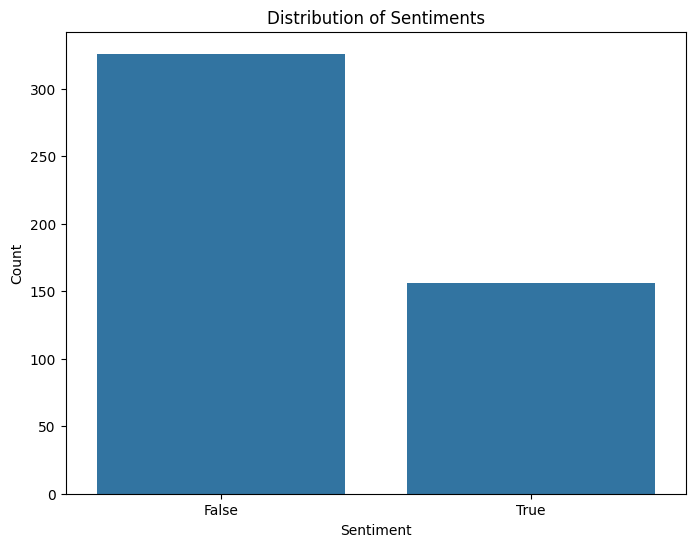

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_filled)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


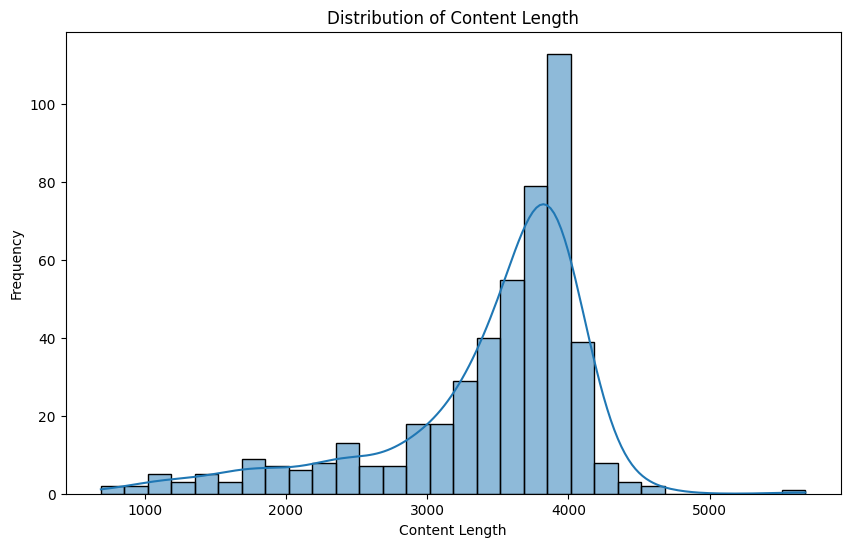

In [31]:
# Calculate the length of each content entry
df_filled['Content_Length'] = df_filled['Content'].apply(len)

# Plot distribution of content length
plt.figure(figsize=(10, 6))
sns.histplot(df_filled['Content_Length'], bins=30, kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()


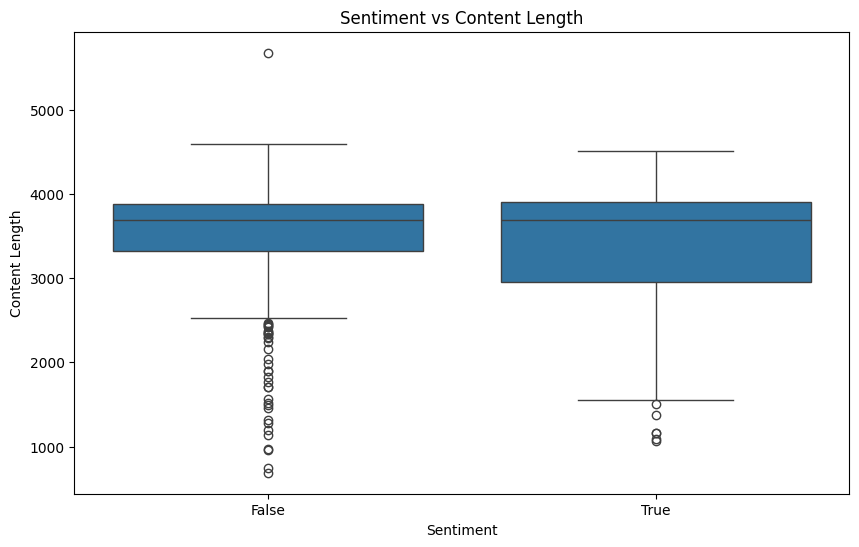

In [32]:
# Plot sentiment vs. content length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Content_Length', data=df_filled)
plt.title('Sentiment vs Content Length')
plt.xlabel('Sentiment')
plt.ylabel('Content Length')
plt.show()


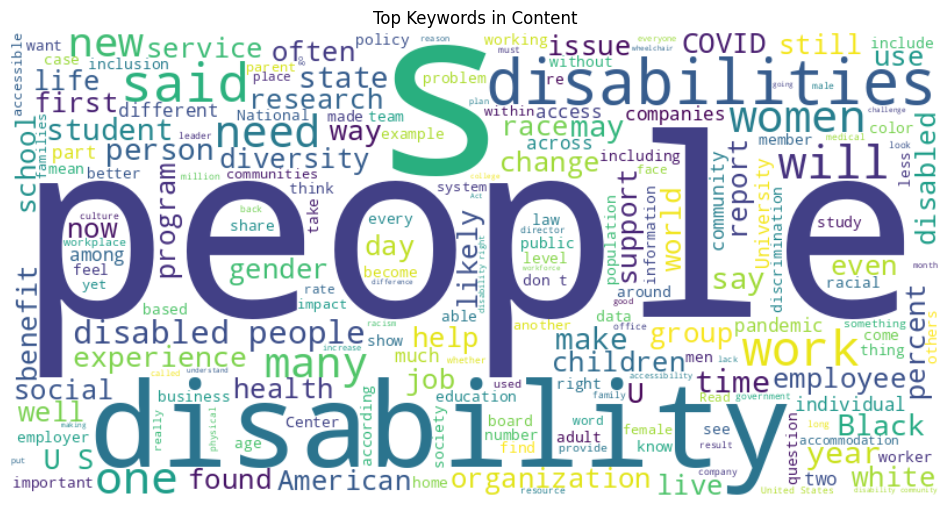

In [34]:
from wordcloud import WordCloud

# Combine all the content into a single string
text = ' '.join(df_filled['Content'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Content')
plt.show()


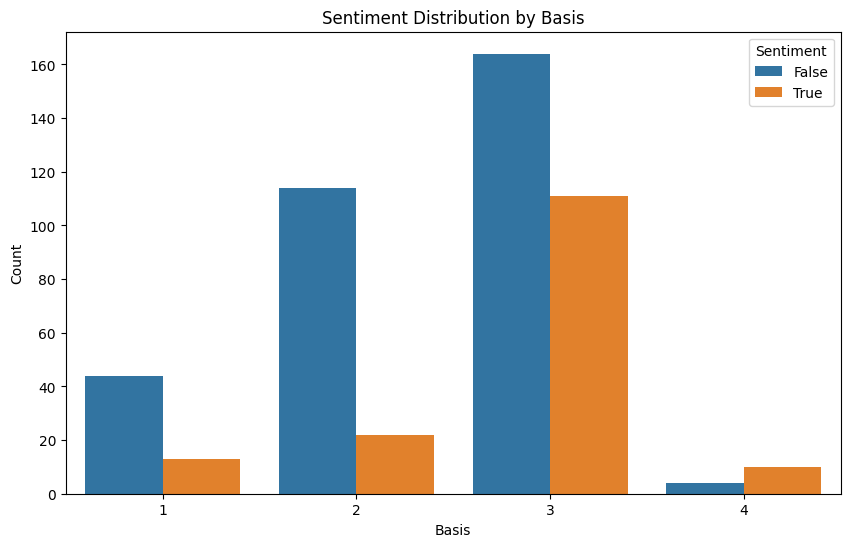

In [35]:
# Plot sentiment distribution by basis (if 'Basis' is a meaningful categorical feature)
plt.figure(figsize=(10, 6))
sns.countplot(x='Basis', hue='Sentiment', data=df_filled)
plt.title('Sentiment Distribution by Basis')
plt.xlabel('Basis')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()
